# Weather Sampling


### Temperature: 
### Input: 
compiled weather data (regionally) 
ftp://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/

### Output: 
PDF: per month sample of average temperature
sampling technique {given point, what is the probability of getting it}


http://www.pyrunner.com/weblog/2015/12/08/basic-statistics-and-timeseries-pandas/



In [3]:
import pandas as pd
import numpy as np
import os
from os.path import dirname
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import spatial


hourly_precip_lookup = ["/test_dataset/weather_data/hourly/precipitation/recent/", "hourly_precip_compiled.csv"]
hourly_air_lookup =  ["/test_dataset/weather_data/hourly/air_temperature/recent/", "hourly_air_temp_compiled.csv"]

# absolute directory
d = os.path.dirname(os.getcwd())

# relative directory
file_path = "/test_dataset/data/generated_data1.csv"


In [2]:
## sample data set
df = pd.read_csv(d + file_path)
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,...,Coordinates,formattedTime,month,Temperature,Precipitation,Open_Data,RoadTypes,Coordinates_Joined,closest_station,station_id
0,0,0,0,0,00243.ppm,39,39,6,5,34,...,"(50.77368911546188, 14.90019617615455)",2018-04-22 14:13,4,13.671968,1.185181,"{""place_id"":27871537,""licence"":""Data © OpenStr...",tourism,"(14.90019618, 50.77368912)","(14.7457, 50.898999999999994)",2252
1,1,1,1,1,00252.ppm,51,52,6,6,46,...,"(48.51778958678418, 13.97830932764219)",2018-06-17 06:32,6,11.433084,2.525739,"{""place_id"":151388289,""licence"":""Data © OpenSt...",building,"(13.97830933, 48.51778959)","(13.6291, 48.7893)",1735
2,2,2,2,2,00403.ppm,43,44,5,5,38,...,"(51.295523486623914, 11.410803378686577)",2019-03-22 23:04,3,-8.245346,0.125701,"{""place_id"":23868020,""licence"":""Data © OpenStr...",highway,"(11.41080338, 51.29552349)","(11.292, 51.3745)",198
3,3,3,3,3,00579.ppm,37,37,6,6,32,...,"(53.10506033953469, 6.215769916722947)",2018-06-06 20:13,6,13.242672,12.194975,"{""place_id"":38726811,""licence"":""Data © OpenStr...",place,"(6.215769917, 53.10506034)","(6.7024, 53.5984)",7373
4,4,4,4,4,00675.ppm,45,47,5,5,40,...,"(52.178771746878354, 8.063867173416643)",2019-01-30 18:39,1,-29.671187,7.520255,"{""place_id"":82948809,""licence"":""Data © OpenStr...",amenity,"(8.063867173, 52.17877175)","(8.0534, 52.2553)",3815


## Finds the closest station 
uses the cdist to Pairwise distances between observations

@toDo: make sure the stationsLists are consistent between the two


In [7]:
## Find closest station point to coordinates 
weather_file_path = "/test_dataset/weather_data/stations.csv"
df_stations_list = pd.read_csv(d + weather_file_path)
print(df_stations_list.columns.values)
df_stations_list['All_Stations_Coordinates'] = list(zip(df_stations_list['geoLaenge'], df_stations_list['geoBreite']))
df['Coordinates_Joined'] = list(zip(df.Longitude, df.Latitude))

['Stations_id' 'von_datum' 'bis_datum' 'Stationshoehe' 'geoBreite'
 'geoLaenge' 'Stationsname' 'Bundesland' 'Unnamed: 8' 'Unnamed: 9'
 'Unnamed: 10']


In [9]:
import pandas as pd
from scipy.spatial.distance import cdist

def closest_point(point, points):
    """ Find closest point from a list of points. """
    return points[cdist([point], points).argmin()]

def match_value(df, col1, x, col2):
    """ Match value x from col1 row to value in col2. """
    return df[df[col1] == x][col2].values[0]


df['closest_station'] = [closest_point(x, list(df_stations_list['All_Stations_Coordinates'])) for x in df['Coordinates_Joined']]
df['station_id'] = [match_value(df_stations_list, 'All_Stations_Coordinates', x, 'Stations_id') for x in df['closest_station']]
df.to_csv(d + file_path)


In [42]:
## ## Hourly need to recreate this 

hourly_air_temp_df = pd.read_csv(d + hourly_air_lookup[0] + hourly_air_lookup[1], ";")
hourly_air_temp_df.drop(hourly_air_temp_df.loc[hourly_air_temp_df['TT_TU']==-999].index, inplace=True)
print(max(hourly_air_temp_df['TT_TU']))
print(min(hourly_air_temp_df['TT_TU']))
hourly_air_temp_df.describe()


KeyboardInterrupt: 

In [41]:
#print(type(hourly_air_temp_df['MESS_DATUM']))
hourly_air_temp_df['formattedTime'] = pd.to_datetime(hourly_air_temp_df['MESS_DATUM'].astype(str), format='%Y%m%d%H', errors='ignore')
hourly_air_temp_df['month'] = pd.to_datetime(hourly_air_temp_df['formattedTime']).dt.strftime('%m')
hourly_air_temp_df.groupby(['month']).mean()


,STATIONS_ID,MESS_DATUM,QN_9,TT_TU,RF_TU,2017102000,3,16.3,65.0,eor
month,,,,,,,,,,
01,3735.586958,2.018509e+09,3.000000,2.092450,86.328864,NaN,NaN,NaN,NaN,NaN
02,3742.775176,2.018518e+09,3.000000,0.921273,77.726190,NaN,NaN,NaN,NaN,NaN
03,3743.512679,2.018528e+09,2.743242,4.405883,77.111287,NaN,NaN,NaN,NaN,NaN
04,3742.650205,2.018462e+09,2.158254,10.813550,66.873219,NaN,NaN,NaN,NaN,NaN
05,3717.385031,2.018052e+09,3.000000,15.843544,68.325104,NaN,NaN,NaN,NaN,NaN
06,3721.550372,2.018062e+09,3.000000,17.630494,71.209262,NaN,NaN,NaN,NaN,NaN
07,3723.337450,2.018072e+09,3.000000,20.200069,62.175363,NaN,NaN,NaN,NaN,NaN
08,3720.136902,2.018082e+09,3.000000,19.847027,64.295228,NaN,NaN,NaN,NaN,NaN
09,3717.033215,2.018092e+09,3.000000,15.027575,71.603376,NaN,NaN,NaN,NaN,NaN


In [1]:
#monthly = hourly_air_temp_df.groupby('month')
#hourly_air_temp_df.to_csv(d+"/test_dataset/weather_data/dummy_generator.csv")

hourly_air_temp_df["month"] = hourly_air_temp_df.month.astype(float)


NameError: name 'hourly_air_temp_df' is not defined

# Monthly Precipitation 
## per month 

## per station 

In [36]:
precip_path = "/test_dataset/weather_data/precip/ftp-cdc.dwd.de/depr/CDC/observations_germany/climate/monthly/more_precip/historical/"
header_ = "STATIONS_ID; MESS_DATUM_BEGINN; MESS_DATUM_ENDE; QUALITAETS_NIVEAU; ART; NIEDERSCHLAGSHOEHE;NEUSCHNEEHOEHE;SCHNEEHOEHE; ART; max(NIEDERSCHLAGSHOEHE);eor"


In [41]:
precip_df = pd.read_csv(d + precip_path + "compiled_.csv", ";")
precip_df.head()

# remove rows with "999"
precip_df.drop(precip_df.loc[precip_df['NEUSCHNEEHOEHE']==-999].index, inplace=True)
precip_df['formattedTime'] = pd.to_datetime(precip_df[' MESS_DATUM_BEGINN'], format='%Y%m%d', errors='ignore')
precip_df['month'] = pd.to_datetime(precip_df['formattedTime']).dt.strftime('%m')

In [39]:
months = precip_df.groupby('month').mean() 
print(months)

       STATIONS_ID   MESS_DATUM_BEGINN   MESS_DATUM_ENDE   QUALITAETS_NIVEAU  \
month                                                                          
01     2606.807820        1.992512e+07      1.992515e+07            8.265442   
02     2605.605556        1.992483e+07      1.992486e+07            8.262489   
03     2605.749556        1.992495e+07      1.992498e+07            8.264809   
04     2604.366103        1.992477e+07      1.992480e+07            8.271008   
05     2603.867555        1.992053e+07      1.992056e+07            8.388080   
06     2603.571293        1.992050e+07      1.992053e+07            8.388548   
07     2604.386209        1.992039e+07      1.992042e+07            8.389429   
08     2604.168234        1.992048e+07      1.992051e+07            8.388454   
09     2603.074233        1.992062e+07      1.992065e+07            8.358090   
10     2604.234366        1.992524e+07      1.992527e+07            8.180004   
11     2606.165909        1.992547e+07  

# Monthly Air Temperature

# PDF by region and sampling month

b'Skipping line 1383: expected 20 fields, saw 39\n'


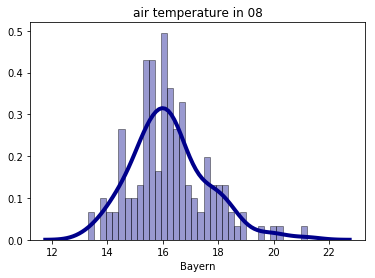

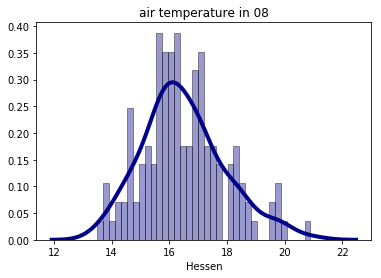

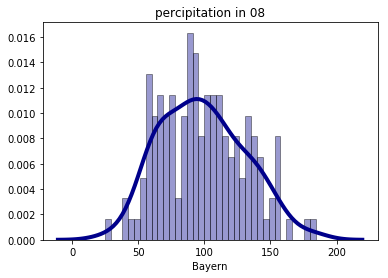

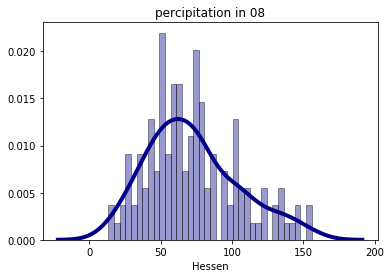

In [3]:
temperature_data_path = "/test_dataset/weather_data/regional_average_air_temp/compiled_air_temp.csv"
path = d+temperature_data_path
df_temperature = pd.read_csv(path, sep=';', error_bad_lines=False)


precip_data_path = "/test_dataset/weather_data/regional_average_monthly_precipitation/compiled_precip.csv"
path = d+precip_data_path
df_percip = pd.read_csv(path, sep=';', error_bad_lines=False)



def get_monthly_samples_by_region(df_type, month, region_name, title):
    df_subsample = df_type.loc[df_type['Monat'] == month]
    tips = sns.load_dataset("tips")
    sns.distplot(pd.to_numeric(df_subsample[region_name]), hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}).set_title(title + " in " + month)
    plt.show()
    

## TEMPERATURE PROFILES
get_monthly_samples_by_region(df_temperature, "08", "Bayern", "air temperature")
get_monthly_samples_by_region(df_temperature, "08", "Hessen",  "air temperature")

## PERCIPITATION PROFILES
get_monthly_samples_by_region(df_percip, "08", "Bayern", "percipitation")
get_monthly_samples_by_region(df_percip, "08", "Hessen", "percipitation")

## add rejection sampling 






# Hourly 
airtemp: 

ftp://ftp-cdc.dwd.de/depr/CDC/observations_germany/climate/hourly/air_temperature/recent/

precipitation: 

ftp://ftp-cdc.dwd.de/depr/CDC/observations_germany/climate/hourly/precipitation/recent/



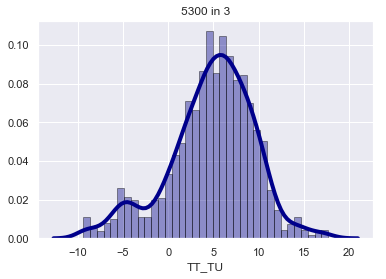

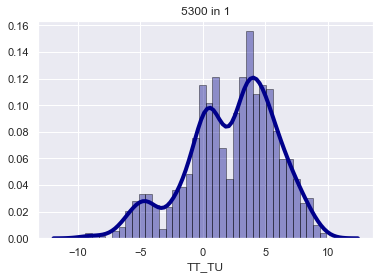

In [9]:
hourly_air_temp_df = pd.read_csv(d+"/test_dataset/weather_data/dummy_generator.csv")
def plot_by_month():
    for i in range(1,13):
        if i < 10: 
            string = "0" + str(i)
        else: 
            string = str(i)
        df_subsample = hourly_air_temp_df.loc[hourly_air_temp_df['month'] == string]
        tips = sns.load_dataset("tips")
        sns.distplot(pd.to_numeric(df_subsample["TT_TU"]), hist=True, kde=True, 
                 bins=int(180/5), color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4}).set_title(string + " in " + "GERMANY")
        plt.plot()
        plt.show()
    

def plot_by_station_by_month(station_id, month):
    """ {QUERY: month, & stations_id}  """  
    df_subsample = hourly_air_temp_df.loc[(hourly_air_temp_df['month'] == month) 
                                          & (hourly_air_temp_df['STATIONS_ID'] == station_id)]
    tips = sns.load_dataset("tips")
    sns.distplot(pd.to_numeric(df_subsample["TT_TU"]), hist=True, kde=True, 
                 bins=int(180/5), color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4}).set_title(str(station_id) + " in " + str(month))
    plt.plot()
    plt.show()

plot_by_station_by_month(5300, 3)
plot_by_station_by_month(5300, 1)






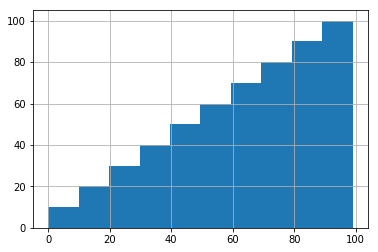

In [65]:
### TO DO Rejection sampling 

In [7]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt


sns.set()


def p(x):
    return st.norm.pdf(x, loc=30, scale=10) + st.norm.pdf(x, loc=80, scale=20)


def q(x):
    return st.norm.pdf(x, loc=50, scale=30)


x = np.arange(-50, 151)
k = max(p(x) / q(x))

## x is our temperature 

print(x)


def rejection_sampling(iter=1000):
    samples = []

    for i in range(iter):
        z = np.random.normal(50, 30)
        u = np.random.uniform(0, k*q(z))

        if u <= p(z):
            samples.append(z)

    return np.array(samples)


if __name__ == '__main__':
    print("HELLO")
#     plt.plot(x, p(x))
#     plt.plot(x, k*q(x))
#     plt.show()

#     s = rejection_sampling(iter=10)
#     print(s)
#     sns.distplot(s)

[-50 -49 -48 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33
 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15
 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3
   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150]
HELLO


In [1]:
import numpy as np
pdf = lambda x: np.exp(-x**2/2) # unit Gaussian, not normalized
from itsample import sample
samples = sample(pdf,1000) 

ModuleNotFoundError: No module named 'itsample'